In [23]:
from nltk.tree import Tree
from nltk.util import breadth_first
import os
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup


In [3]:
data_path = '../../data/MovieSummaries/corenlp_plot_summaries/sample/'

In [7]:
file_list = [item for item in os.listdir(data_path) if 'xml' in item]

In [27]:
f = open(os.path.join(data_path, file_list[0]), 'r').read()
xml = BeautifulSoup(f)

/anaconda3/envs/python36/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/envs/python36/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [32]:
sentences = xml.document.sentences.findAll('sentence')
for sent in sentences:
    print(sent.parse)
    break

In [44]:
t = Tree.fromstring(s)

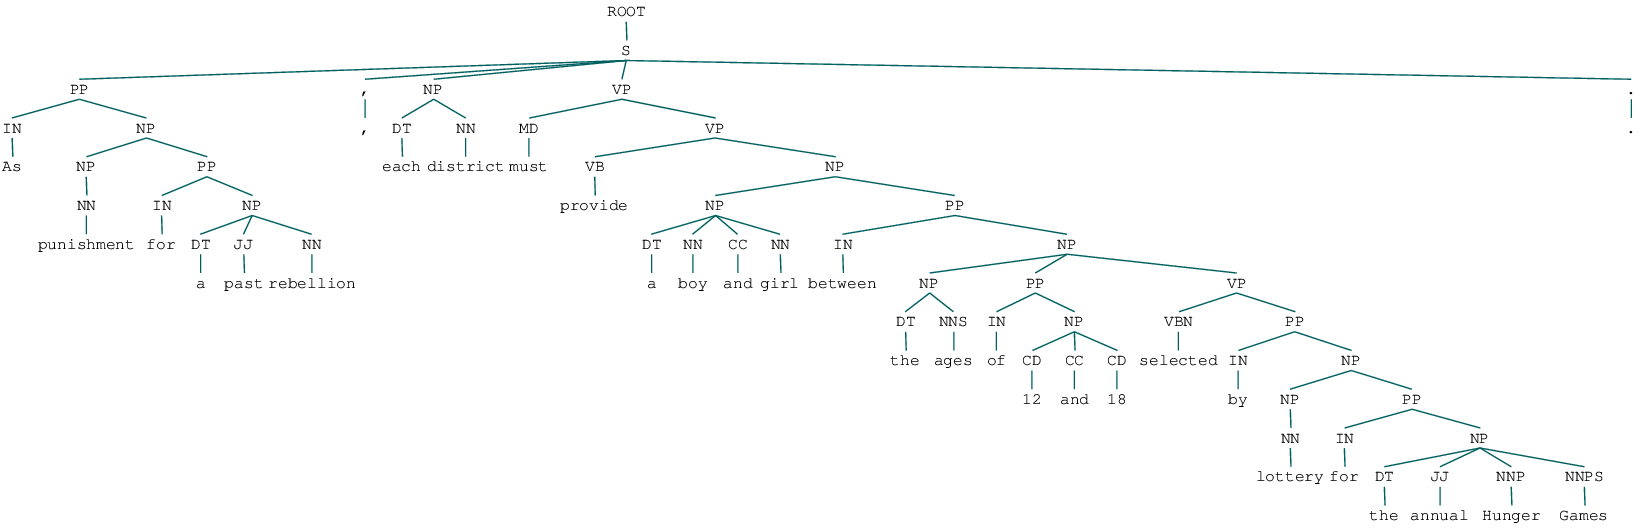

In [45]:
t

In [7]:
t.height()

8

In [36]:
def find_np(tree):
    for c in breadth_first(tree, maxdepth = 2):
        if c.label() == 'NP':
            return c.leaves()

In [108]:
def find_vp(tree):
    for c in breadth_first(tree, maxdepth = 2):
        if c.label() == 'VP':
            for cc in breadth_first(c, maxdepth = 3):
                try:
                    if cc.label()[0:2] == 'VB':
                        print(cc)
                except:
                    pass
            break

In [109]:
find_vp(t)

(VB provide)


In [23]:
def filt(x):
    return x.label()=='NP' and x.height() ==7

for subtree in t.subtrees(filter =  filt): # Generate all subtrees
    print (subtree)